In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv("Employee_dataset.csv")

In [3]:
df


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


## Data preprocessing

In [5]:
# Check for missing data
missing_data = df.isnull().sum()
missing_data 

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

In [7]:
# looking for duplicate data
duplicate_data=df.duplicated().sum()
duplicate_data

0

In [11]:
# Correct the 'Height' column with random values between 150 and 180
df['Height'] = np.random.randint(150, 181, size=len(df))
df['Height']

0      174
1      172
2      169
3      180
4      169
      ... 
453    161
454    164
455    150
456    179
457    177
Name: Height, Length: 458, dtype: int32

In [13]:
# Ensure data types are correct
df['Age'] = df['Age'].astype(int)
df['Age']

0      25
1      25
2      27
3      22
4      29
       ..
453    26
454    24
455    26
456    26
457    25
Name: Age, Length: 458, dtype: int32

In [14]:
df['Salary'] = df['Salary'].astype(float)
df['Salary']

0      7730337.0
1      6796117.0
2            NaN
3      1148640.0
4      5000000.0
         ...    
453    2433333.0
454     900000.0
455    2900000.0
456     947276.0
457     947276.0
Name: Salary, Length: 458, dtype: float64

## Data Analysis

In [16]:
# 1. Count employees in each team and calculate the percentage
team_counts = df['Team'].value_counts()
team_counts

Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Boston Celtics            15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Dallas Mavericks          15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64

In [17]:
total_employees = len(df)
percentage_split = (team_counts / total_employees) * 100
percentage_split

Team
New Orleans Pelicans      4.148472
Memphis Grizzlies         3.930131
Utah Jazz                 3.493450
New York Knicks           3.493450
Milwaukee Bucks           3.493450
Brooklyn Nets             3.275109
Portland Trail Blazers    3.275109
Oklahoma City Thunder     3.275109
Denver Nuggets            3.275109
Washington Wizards        3.275109
Miami Heat                3.275109
Charlotte Hornets         3.275109
Atlanta Hawks             3.275109
San Antonio Spurs         3.275109
Houston Rockets           3.275109
Boston Celtics            3.275109
Indiana Pacers            3.275109
Detroit Pistons           3.275109
Cleveland Cavaliers       3.275109
Chicago Bulls             3.275109
Sacramento Kings          3.275109
Phoenix Suns              3.275109
Los Angeles Lakers        3.275109
Los Angeles Clippers      3.275109
Golden State Warriors     3.275109
Toronto Raptors           3.275109
Philadelphia 76ers        3.275109
Dallas Mavericks          3.275109
Orlando Magic  

In [18]:
# 2. Segregate employees by different positions
positions = df['Position'].unique()
positions

array(['PG', 'SF', 'SG', 'PF', 'C'], dtype=object)

In [19]:
df['Position'].nunique()

5

In [20]:
# Average salary for each position
average_salary_by_position = df.groupby('Position')['Salary'].mean().sort_values(ascending=False)
average_salary_by_position 

Position
C     5.903511e+06
PG    5.077829e+06
SF    4.857393e+06
PF    4.562483e+06
SG    4.009861e+06
Name: Salary, dtype: float64

In [21]:
#(Total no.of Employees in a particular position.)

position_counts=df['Position'].value_counts()
position_counts

Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64

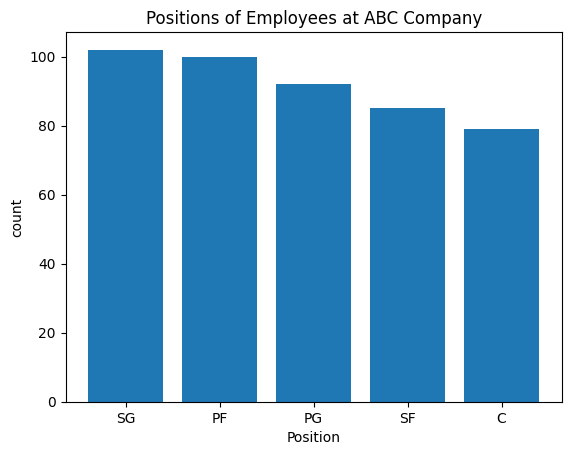

In [24]:
# Create a bar plot for position counts

x= df['Position'].value_counts()
plt.bar(x.index, x)

plt.title('Positions of Employees at ABC Company')
plt.xlabel('Position')
plt.ylabel('count')

plt.show()

In [25]:
# Summary
summary_df = pd.DataFrame({
    'Position': position_counts.index,
    'Count': position_counts.values,
    'Average Salary': average_salary_by_position.values
})
summary_df 

,Position,Count,Average Salary
0,SG,102,5.903511e+06
1,PF,100,5.077829e+06
2,PG,92,4.857393e+06
3,SF,85,4.562483e+06
4,C,79,4.009861e+06


In [26]:
# 3. Find the age group with the most employees
age_groups = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70, 80], 
                    labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])
most_common_age_group = age_groups.mode().values[0]
most_common_age_group

'20-30'

In [27]:
# age group 

age_group=df[['Age']].sort_values(['Age'], ascending=False)
age_group

,Age
400,40
298,40
304,40
261,39
102,39
...,...
208,20
192,20
85,20
226,19


In [29]:
df['Age'].value_counts().sort_values(ascending=False)

Age
24    47
25    46
27    41
23    41
26    36
28    31
30    31
29    28
22    26
31    22
21    19
20    19
33    14
32    13
34    10
36    10
35     9
37     4
38     4
40     3
39     2
19     2
Name: count, dtype: int64

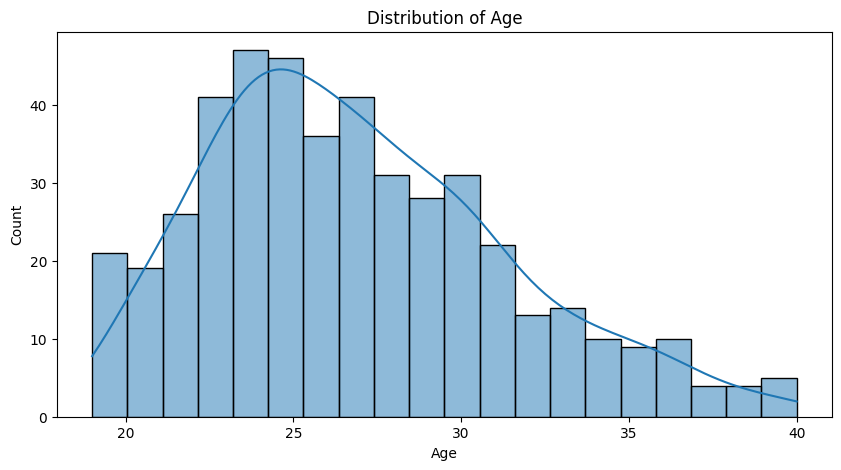

In [33]:
# Distribution of Age
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [36]:
# 4. Identify the team and position with the highest salary spending
highest_salary = df['Salary'].max()
highest_salary 
highest_salary_employees = df[df['Salary'] == highest_salary]
highest_salary_employees

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
109,Kobe Bryant,Los Angeles Lakers,24,SF,37,156,212,NaN,25000000.0


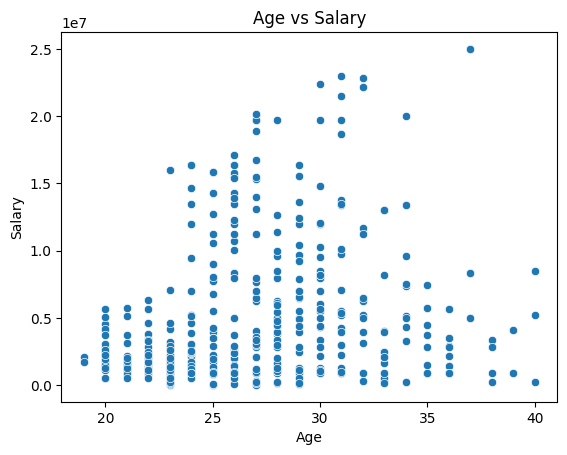

In [41]:
# 5. Analyze the correlation between age and salary visually

sns.scatterplot(data=df, x='Age', y='Salary')
plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()



## Summary

### "When we analyse the scatterplot, We can understand that there is no Correlation with age and salary of the employees of the company"